# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data

the images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101
However we've modified it to only use two classes (pizza and steak) using image the data modification book

**Note:** We start with a smaller dataset so we can experiment quickly and figure and figure what works (or better yet what doesn't work) before scaling up.

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-27 12:42:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   169MB/s    in 0.6s    

2021-10-27 12:42:43 (169 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

#Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Oct 27 12:42 .
drwxr-xr-x 1 root root 4096 Oct 27 12:42 ..
-rw-r--r-- 1 root root 6148 Oct 27 12:42 .DS_Store
drwxr-xr-x 4 root root 4096 Oct 27 12:42 test
drwxr-xr-x 4 root root 4096 Oct 27 12:42 train


In [ ]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first lets get our class names programmatically

In [ ]:
# Get the classnames programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of class_names from the subdirectories
class_names = class_names[1:] # remove .dS_Store
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3082068.jpg']
Image shape: (318, 512, 3)


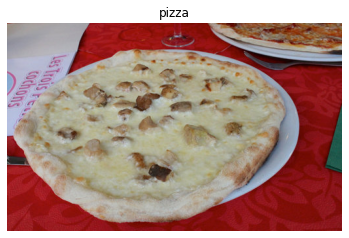

In [ ]:
#View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")
#img

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(318, 512, 3), dtype=uint8, numpy=
array([[[144,  61,  57],
        [146,  65,  62],
        [149,  74,  71],
        ...,
        [123,  97,  82],
        [117,  94,  76],
        [125, 103,  82]],

       [[155, 129, 114],
        [156, 133, 119],
        [157, 135, 121],
        ...,
        [130,  94,  70],
        [124,  80,  53],
        [130,  85,  52]],

       [[160, 150, 138],
        [160, 152, 139],
        [159, 151, 140],
        ...,
        [116,  66,  39],
        [121,  61,  24],
        [138,  71,  28]],

       ...,

       [[153,  23,  33],
        [148,  18,  26],
        [158,  28,  36],
        ...,
        [123,  10,   4],
        [122,   9,   3],
        [123,  10,   6]],

       [[161,  31,  41],
        [154,  24,  34],
        [159,  32,  39],
        ...,
        [127,  13,  13],
        [126,  12,  12],
        [127,  13,  13]],

       [[157,  25,  38],
        [152,  22,  32],
        [154,  27,  36],
        ...,
        [134,  19,  2

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(318, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.56470588, 0.23921569, 0.22352941],
        [0.57254902, 0.25490196, 0.24313725],
        [0.58431373, 0.29019608, 0.27843137],
        ...,
        [0.48235294, 0.38039216, 0.32156863],
        [0.45882353, 0.36862745, 0.29803922],
        [0.49019608, 0.40392157, 0.32156863]],

       [[0.60784314, 0.50588235, 0.44705882],
        [0.61176471, 0.52156863, 0.46666667],
        [0.61568627, 0.52941176, 0.4745098 ],
        ...,
        [0.50980392, 0.36862745, 0.2745098 ],
        [0.48627451, 0.31372549, 0.20784314],
        [0.50980392, 0.33333333, 0.20392157]],

       [[0.62745098, 0.58823529, 0.54117647],
        [0.62745098, 0.59607843, 0.54509804],
        [0.62352941, 0.59215686, 0.54901961],
        ...,
        [0.45490196, 0.25882353, 0.15294118],
        [0.4745098 , 0.23921569, 0.09411765],
        [0.54117647, 0.27843137, 0.10980392]],

       ...,

       [[0.6       , 0.09019608, 0.12941176],
        [0.58039216, 0.07058824, 0.10196078],
        [0.61960784, 0

## An end-to-end example

Lets build a convolutional neural network to find patterns in our images, more specifically, we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalisation)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen =  ImageDataGenerator(rescale=1./255)


#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),     
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 100s 2s/step - loss: 0.5698 - accuracy: 0.6993 - val_loss: 0.3735 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 99s 2s/step - loss: 0.4261 - accuracy: 0.8173 - val_loss: 0.3438 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 99s 2s/step - loss: 0.3794 - accuracy: 0.8260 - val_loss: 0.3103 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 99s 2s/step - loss: 0.3538 - accuracy: 0.8513 - val_loss: 0.3029 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 99s 2s/step - loss: 0.3259 - accuracy: 0.8607 - val_loss: 0.3088 - val_accuracy: 0.8720


**Note:** if the avove cell is taking longer than 20 seconds per epoch make sure youre using a gpu by  going to runtime-> change runtime type->  hardware accelerator -> choose gpu

In [ ]:
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - 101s 2s/step - loss: 0.5620 - accuracy: 0.7100 - val_loss: 0.4202 - val_accuracy: 0.8120


In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

CNN explainer website
https://poloclub.github.io/cnn-explainer/

## Using the same model as before

lets replicate the model we've built in a previous section to see if it works with out image data.
The model we're building is from the TensorFlow playground

In [ ]:
# Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(
    train_data,epochs=5,steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 0.7567 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 224ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
#Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x trainable parameters than out cnn model1, model2 performs terribly.. lets try to improve it

In [ ]:
#model 3
# Set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model again
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),                             
  tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_3 = model_3.fit(
    train_data,epochs=5,steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 14s 293ms/step - loss: 4.3829 - accuracy: 0.5720 - val_loss: 0.6879 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 13s 284ms/step - loss: 0.6712 - accuracy: 0.7347 - val_loss: 0.4801 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 13s 285ms/step - loss: 0.5298 - accuracy: 0.7487 - val_loss: 0.4752 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 14s 288ms/step - loss: 0.6204 - accuracy: 0.7227 - val_loss: 0.4847 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 14s 288ms/step - loss: 0.6481 - accuracy: 0.7293 - val_loss: 0.4943 - val_accuracy: 0.7660


In [ ]:
#Get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** we can think of trainable parameters as patterns a model can learn from data

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary Classification: Lets break it down

1. Become one with the data(visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here scaling/ normalizing and turning our data into batches)
3. Created a model (start wth a basline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3159818.jpg']
Image shape: (512, 512, 3)
['1207213.jpg']
Image shape: (512, 512, 3)


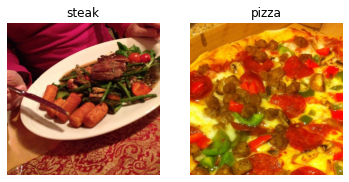

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/" 

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time,
 a model might only look at 32 at a time.


It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn rthe patterns in 10000 images in one hit could result in the model not being to learn very well.

Why 32?

Because 32 is good for your health

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,# target dir of images
                                               target_size=(224,224), # target size of images height, width
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of train data batch
images, labels = train_data.next() # get the next batch of images/labes in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#Get the first two images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
#View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup whem beginning a machine learning
experiment and then as you keep experimenting, you try to beat the baseline

**Note:** In deep learning there is an infiite amout of archis to use, so start with soemthing simple and see if it works on your data(introduce complexity as required), e.g look up current model that is performing best in the field for your problem.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
#Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, #filter is the number of sliding windows across an input, higher equals more more complex model
           kernel_size=(3,3), # the size of the sliding window going across an input
           strides=(1,1), # the size of the step the slding window takes across an input
           padding="valid", #if "same" output shape same as input shape, if "valid" output shape is compressed
           activation="relu",
           input_shape=(224,224,3)), #input layer(specify input shape)
           Conv2D(10,3,activation="relu"),
           Conv2D(10,3,activation="relu"),
           Flatten(),
           Dense(1,activation="sigmoid") #output layer (working with binary classification 1 output neuron)


])


In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data) , len(test_data)

(47, 16)

In [ ]:
# Fit the model this is a combination of labels and sample data
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 116s 2s/step - loss: 1.7719 - accuracy: 0.5520 - val_loss: 0.5152 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 114s 2s/step - loss: 0.5094 - accuracy: 0.7680 - val_loss: 0.4356 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 114s 2s/step - loss: 0.4036 - accuracy: 0.8333 - val_loss: 0.4080 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 115s 2s/step - loss: 0.2898 - accuracy: 0.8847 - val_loss: 0.3694 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 116s 2s/step - loss: 0.1427 - accuracy: 0.9567 - val_loss: 0.4467 - val_accuracy: 0.8300


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 11s 647ms/step - loss: 0.3088 - accuracy: 0.8720


[0.3087751269340515, 0.871999979019165]

###5. Evaluating our model

it looks like our model is learning something lets evaluate it

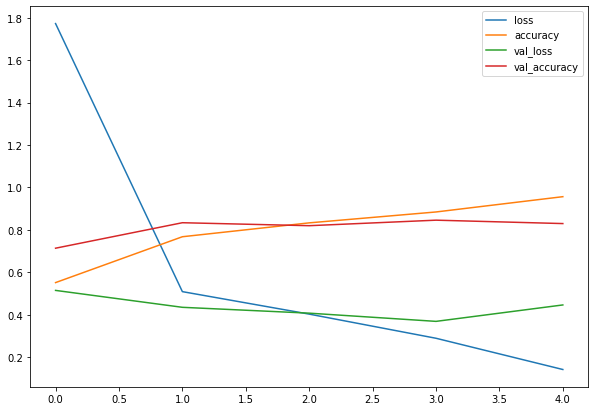

In [ ]:
# Lets plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# PLOT THE VALIDATION AND TRAINING CURVES SEPARATELY

def plot_loss_curves(history):
  """
  Returns separete loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  #Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, its likely that the model is **overfitting** the training datatset. This means, its learning the patterns in the training datatset to well and thus the models ability to generalize to unseed data will be diminished.

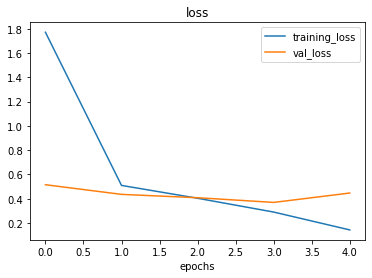

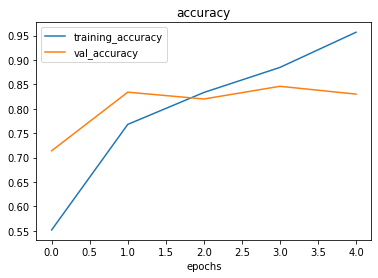

In [ ]:
#Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learniing model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfittting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of out flattened layer

Reduce overfitting:
 * Add data augmentation
 * Add regularization layers (such as MaxPool2D)
 * Add more data...

   **Note:**  Reducing overfitting is also known as *regularization*



In [ ]:
# Create the model (new baseline)
model_5 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
    MaxPool2D(),
  Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 52s 1s/step - loss: 0.6227 - accuracy: 0.6520 - val_loss: 0.5237 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.4781 - accuracy: 0.7767 - val_loss: 0.4265 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.4344 - accuracy: 0.8080 - val_loss: 0.3871 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.4205 - accuracy: 0.8220 - val_loss: 0.3793 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 51s 1s/step - loss: 0.3840 - accuracy: 0.8453 - val_loss: 0.3231 - val_accuracy: 0.8640


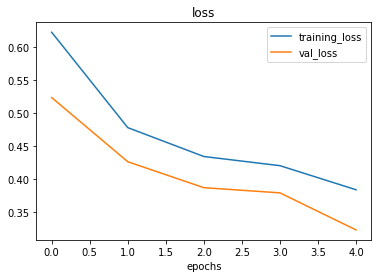

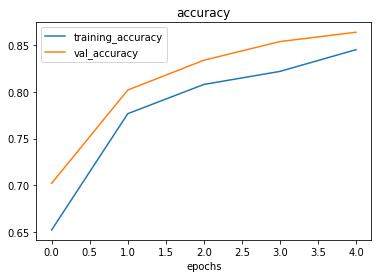

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Creae ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,# how much do you want to rotate an image?
                                             shear_range=0.2, #how much do you want to shear an image?
                                             zoom_range=0.2, #zoom in randomly on an image
                                             width_shift_range=0.2, #move your image on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?


Data augmentation is the process of altering our training data, leading it to have more diversity and inturn allowing our models to learn more generalize (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


Let's write some code to visualize data augmentation..

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary",
                                          shuffle=False) # for demonstration purposes only

# Create non-augmented train data batche
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

IMG_SIZE = (224,224)
#Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")



Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using 'ImageDataGenerator' built in data augmentation parameters our images are left as they are in the directotires but are modified as they're loaded into the model.

Finally... lets visualize some augmented data!!!

In [ ]:
# Get sample data batche
images,labels = train_data.next()
augmented_images, augmented_labels =  train_data_augmented.next() #labels  arent augmented onlt data (images)

showing image number: 17


(-0.5, 223.5, 223.5, -0.5)

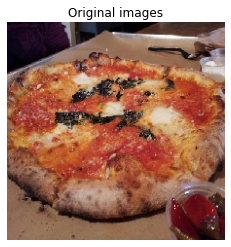

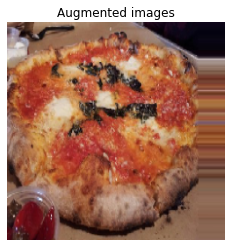

In [ ]:
# Show original image and augmented image
random_number = random.randint(0,32)  #our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented images")
plt.axis(False)

Now we've seen what augmented training data looks like , lets build a model and see how it learns on augmented training data

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
Conv2D(10,3,activation="relu"),
MaxPool2D(pool_size=2),
Conv2D(10,3,activation="relu"),
MaxPool2D(),
Conv2D(10,3,activation="relu"),
MaxPool2D(),
Flatten(),
Dense(1,activation="sigmoid")
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
#Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 66s 1s/step - loss: 0.7081 - accuracy: 0.4660 - val_loss: 0.6824 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.6922 - accuracy: 0.5100 - val_loss: 0.6633 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.6790 - accuracy: 0.6067 - val_loss: 0.5809 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.6582 - accuracy: 0.6473 - val_loss: 0.6061 - val_accuracy: 0.6540
Epoch 5/5
47/47 [==============================] - 65s 1s/step - loss: 0.6047 - accuracy: 0.7080 - val_loss: 0.5242 - val_accuracy: 0.7300


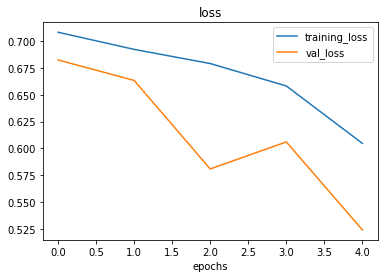

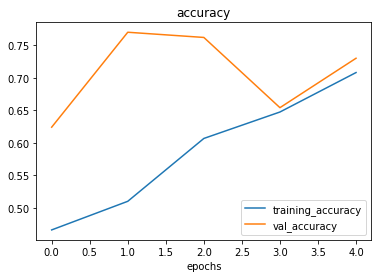

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

### Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary",
                                          shuffle=True) # shuffle data this time


Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)

model_7 = Sequential([
 Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
 MaxPool2D(),
 Conv2D(10,3,activation="relu"),
 MaxPool2D(),
 Conv2D(10,3,activation="relu"),
 MaxPool2D(),
 Flatten(),
 Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data the model gets exposed to all different kids of data during training, thus enabling it to lear features acrodd a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

**Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.



## Making a prediction with our trained model on our own custom data

In [ ]:
#Classes we're working with
print(class_names)

In [ ]:
# View our example image
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

**Note:** whe you train a neural network and you want to make a prediction with it on your own custom data, its important that your custom data (or new data) is preprocessed intot he same format as the data your model was trained on.

In [ ]:
# Create a funtion to import an image and resize it to be able to be used with our model

def load_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turn it into a tensor and reshapes it to (img_shape, img_shape, colour_channels). 
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img  = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
steak = load_prep_image("03-steak.jpeg")
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

Looks like our custom image is being put through our model, howver, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the models prediction?

In [ ]:
 # Remind ourselves of our class names
 class_names

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plt(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]


  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


In [ ]:
# Test our model on a custom image
pred_and_plt(model_7, "03-steak.jpeg")

Our model works! lETS TRY IT ON ANOTHER IMAGE... THIS time PIZZA 

In [ ]:
#Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

In [ ]:

pred_and_plt(model_6, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. become one with the data
2. preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip out data
zip_ref =zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


In [ ]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
 print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Setup the train and test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
#get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen =ImageDataGenerator(rescale=1/255.)
test_datagen =ImageDataGenerator(rescale=1/255.)

IMG_SIZE=(224,224)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(224,224),batch_size=32,class_mode="categorical")

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(224,224),batch_size=32,class_mode="categorical")


### 3. Create a model (start with a baseline)

We've been talking a lot with a cnn explainer website...
https://poloclub.github.io/cnn-explainer/

how about we just take their model (also on 10 classes) and use it for our problem..?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as  CNN explainer website)
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") #changed to have 10 output neurons and use the softmax activation functions
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



### 4. Fit a model

In [ ]:
# Fit the model

history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

In [ ]:
# Check out the models loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?


my model is doing great!

###6. Adjust the model hyparemeters to beat the baseline and reduce overfitting

due its performance on the training data, its clear our model is learning something

how every its not generalizing well to unseen data
(overfitting).

So lets try and fix overfittimh by..

* **Get more data** - having more data gives a model more oppurtunity to learn diverse patterns...
* **Simplify the model** -  if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reducr # of layers or reducr # hidden units in layers
* **Use data augmentation** - datata augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - trainsfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
# How about we try and simplify the model first
# Lets try to remove 2 convolutional layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as  CNN explainer website)
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") #changed to have 10 output neurons and use the softmax activation functions
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(
    train_data,epochs=5,steps_per_epoch=len(train_data),
    validation_data=test_data,validation_steps=len(test_data)
)

In [ ]:
#Check out the loss curves of model_9
plot_loss_curves(history_9)


In [ ]:
model_9.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as  CNN explainer website)
model_8_1 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") #changed to have 10 output neurons and use the softmax activation functions
])

# Compile the model
model_8_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


Looks like our simplifying didnt really work, the accuracy went down and overfitting continued
How about we try data augmentation??

## Trying to reduce overfitting with data augmentation

Lets try and imrpove our models resulta by usinf augmented training data

Ideally we want to:
Reduct overfittimg (get the train and validation loss curves closer)
Improve validation accuracy

In [ ]:
# Create an augmented data generator
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_data_augmented.flow_from_directory(train_dir,target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")


In [ ]:
#Lets create another model but this time we'll fit it on the augmented training data of 10 classes

model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned moodel (using the same setup as previous models)

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])



In [ ]:
#Fit thr model

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
model_8.evaluate(test_data)


In [ ]:
model_10.evaluate(test_data)

In [ ]:
plot_loss_curves(history_10)

looks much better, loss curves are much closer to each other than the baseline model, and look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/ test accuracy.

how?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in out ImageDataGenerator instance)
- training for longer (e.g 10 epochs intead of 5 epochs)
- try **transfer learning**


### Making a prediction with our trined model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Download some images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg




--2021-10-27 13:04:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-10-27 13:04:26 (42.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2021-10-27 13:04:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
# Reconfig pred_and_plt to work with multiclass images
def pred_and_plt(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted (class binary)
    pred_class = class_names[int(tf.round(pred[0]))]


  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


In [ ]:
#Make a prediction using model_10
pred_and_plot(model=model_10,
              file="03-pizza-dad.jpeg",
              class_names=class_names)

In [ ]:
#Make a prediction using model_10
pred_and_plot(model=model_10,
              file="03-sushi.jpeg",
              class_names=class_names)

In [ ]:
#Make a prediction using model_10
pred_and_plot(model=model_10,
              file="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform well on out custom images but this is because it only achives -39% accuracy on the test data. so we can expect it to 
function quite poorly on the other unseen data

## Saving and loading our model 

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

In [ ]:
model_10.evaluate(test_data)